In [1]:
%matplotlib inline
import json 
import matplotlib.pyplot as plt
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Constants : 

HUB_IP = '10.42.0.55'

# load the files from json 



In [3]:
file_to_load  = 'long_running_multip_light_key.json'
with open(os.path.join( '../files/json/', file_to_load )) as f:
    packets = json.load(f)


clean the input, removes acks and other extra stuff


In [4]:
fixed = [ x for x in packets if (  "tcp" in x and "ip" in x and  x["tcp"]["flags"]=="0x00000018" ) ]

In [5]:
len(fixed)

285

# create an array

In [6]:
fixed[0]

{'description': '342 10.42.0.55',
 'eth': {'addr': '84:7b:eb:20:fd:df',
  'addr_resolved': '84:7b:eb:20:fd:df',
  'dst': '84:7b:eb:20:fd:df',
  'dst_resolved': '84:7b:eb:20:fd:df',
  'ig': '0',
  'lg': '0',
  'src': '68:7f:74:28:a1:5d',
  'src_resolved': '68:7f:74:28:a1:5d',
  'type': '0x00000800'},
 'frame': {'cap_len': '342',
  'date': '2018-11-15',
  'encap_type': '1',
  'ignored': '0',
  'interface_id': '0',
  'interface_name': 'eth0',
  'len': '342',
  'marked': '0',
  'number': '3',
  'offset_shift': '0.000000000',
  'protocols': 'eth:ethertype:ip:tcp:ssl',
  'time': '2018-11-15 20:31:03.476267',
  'time_delta': '0.082780000',
  'time_delta_displayed': '0.082780000',
  'time_epoch': '1542313863.476267000',
  'time_relative': '2.085124000'},
 'ip': {'addr': '10.42.0.55',
  'checksum': '0x00000bb3',
  'checksum_status': '2',
  'dsfield': '0x00000000',
  'dsfield_dscp': '0',
  'dsfield_ecn': '0',
  'dst': '18.223.54.144',
  'dst_host': '18.223.54.144',
  'flags': '0x00004000',
  'fl

In [7]:
t0 = float(packets[0]["frame"]["time_epoch"])

In [8]:
records  = [ {
    "ta": float ( x["frame"]["time_epoch"] ),
    "tr": float ( x["frame"]["time_epoch"] ) - t0, 
    "size": int(  x["frame"]["len"] ),
    "dir" :"o" if x["ip"]["src"]== HUB_IP else "i", 
    "ss" :  int(  x["frame"]["len"] ) * -1 if x["ip"]["src"]== HUB_IP else int(  x["frame"]["len"] )
 
}  for x in fixed ]  

In [9]:
records[:5]

[{'ta': 1542313863.476267,
  'tr': 2.0851240158081055,
  'size': 342,
  'dir': 'o',
  'ss': -342},
 {'ta': 1542313863.519582,
  'tr': 2.128438949584961,
  'size': 1185,
  'dir': 'o',
  'ss': -1185},
 {'ta': 1542313883.249305,
  'tr': 21.85816192626953,
  'size': 115,
  'dir': 'o',
  'ss': -115},
 {'ta': 1542313883.278023,
  'tr': 21.886879920959473,
  'size': 121,
  'dir': 'i',
  'ss': 121},
 {'ta': 1542313897.021633,
  'tr': 35.63048982620239,
  'size': 424,
  'dir': 'o',
  'ss': -424}]

let's see some visualization : 


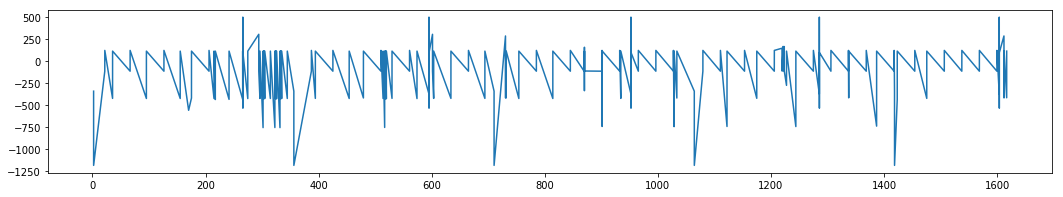

In [10]:
plt.figure( figsize=(18,3) )
plt.plot(   np.array( [ x["tr"] for x in records ] ) ,    np.array( [x["ss"] for x in records ] ))

## Create Count Ngrams from item orders

In [11]:
def ngrammer ( arr, n ):
    
    ret  = [arr[i:i+n] for i in range(len(arr))][:-1*n+1]
    return  ret #?// [ ' '.join(x) for x in ret ]
    
    


In [12]:

indexed_ngrams =  ngrammer( [ x["ss"] for x in records ] ,4 )
big_list  = []
for index in range(2,10):
    big_list.extend(ngrammer( [ x["ss"] for x in records ] ,index ) )

In [13]:
len(big_list)

2244

In [14]:
counters = np.array(np.unique(big_list, return_counts=True)).T

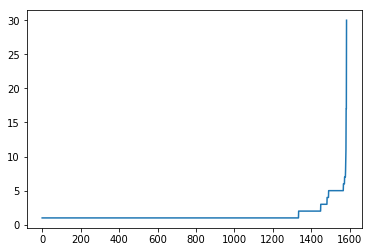

In [15]:
plt.plot( sorted([x[1] for x in  counters]) )

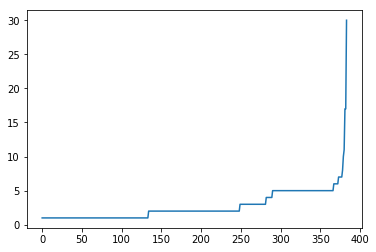

In [16]:
plt.plot( sorted([x[1] for x in  counters])[1200:] )

## Time envolved ngrams


In [17]:
complete_grammed  = []
for index in range(2,10):
    complete_grammed.extend(ngrammer( records,index ) )
    
counters_dic = {  }
for x in counters:
    counters_dic[  str(x[0]) ]= x[1]

In [18]:
  featurres  = [ ( len(x) ,x[-1]["tr"] - x[0]["tr"]  ,  counters_dic[ str(  [ z['ss'] for z in x ]  ) ],  
                    np.sum(  [ z['ss']  for z in x ]), 
                    np.sum(  [ z['ss']  for z in x if z['ss'] >=0 ]),
                    np.sum(  [ z['ss']  for z  in x if z['ss'] <=0 ])) 
                    for x in complete_grammed ]

In [19]:
featurres

[(2, 0.04331493377685547, 5, -1527, 0.0, -1527),
 (2, 19.72972297668457, 3, -1300, 0.0, -1300),
 (2, 0.028717994689941406, 30, 6, 121, -115),
 (2, 13.74360990524292, 5, -303, 121, -424),
 (2, 0.02922511100769043, 8, -311, 113, -424),
 (2, 30.98391103744507, 17, -2, 113, -115),
 (2, 0.028749942779541016, 30, 6, 121, -115),
 (2, 28.773201942443848, 6, -304, 121, -425),
 (2, 0.028890132904052734, 11, -312, 113, -425),
 (2, 30.98924684524536, 17, -2, 113, -115),
 (2, 0.028931140899658203, 30, 6, 121, -115),
 (2, 28.754150867462158, 6, -304, 121, -425),
 (2, 0.03359508514404297, 11, -312, 113, -425),
 (2, 14.86274003982544, 1, -446, 113, -559),
 (2, 5.042165994644165, 1, -979, 0.0, -979),
 (2, 0.0371088981628418, 2, -307, 113, -420),
 (2, 30.974698066711426, 17, -2, 113, -115),
 (2, 0.03178000450134277, 30, 6, 121, -115),
 (2, 8.784372091293335, 6, -304, 121, -425),
 (2, 0.03584694862365723, 11, -312, 113, -425),
 (2, 2.2925360202789307, 1, -324, 113, -437),
 (2, 0.02933788299560547, 1, -32

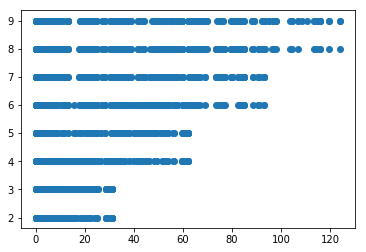

In [20]:
plt.scatter(  
[ x[1] for x in featurres ],
    [x[0] for x in featurres]
) 

In [21]:
#only keep ones where freq >= desired freq
freq = 2
# featurres= [ x for x in featurres if x[2]>=freq ]

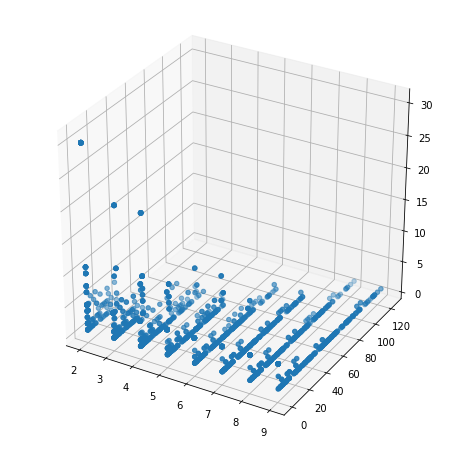

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( xs=[x[0] for x in featurres] , ys=[x[1] for x in featurres], zs=[x[2] for x in featurres] )


In [23]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(featurres)

features_scaled = scaler.transform(featurres)  


In [24]:
from sklearn.cluster import KMeans
classifier = KMeans(n_clusters=10)  

In [25]:
classifier.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
y = classifier.predict(features_scaled)

In [27]:
colors = ['red','blue','green', 'cyan', 'gray','black','magenta','violet','purple','orange']

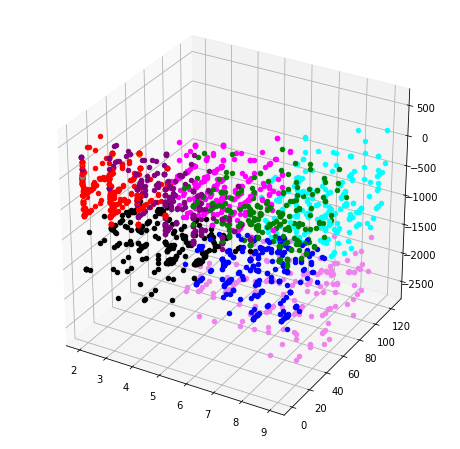

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for x in range(len(y)):
    ax.scatter( xs=featurres[x][0] , ys=featurres[x][1], zs=featurres[x][3], color=colors[y[x]]  )


# try distance calc 



In [29]:
def makeFeatures(path):
    with open(path) as f:
        packets = json.load(f)
    fixed = [ x for x in packets if ("tcp" in x and "ip" in x and  x["tcp"]["flags"]=="0x00000018" ) ]
    
    t0 = float(packets[0]["frame"]["time_epoch"])
    
    records  = [ {
    "ta": float ( x["frame"]["time_epoch"] ),
    "tr": float ( x["frame"]["time_epoch"] ) - t0, 
    "size": int(  x["frame"]["len"] ),
    "dir" :"o" if x["ip"]["src"]== HUB_IP else "i", 
    "ss" :  int(  x["frame"]["len"] ) * -1 if x["ip"]["src"]== HUB_IP else int(  x["frame"]["len"] )
 
    }  for x in fixed ]
    
    big_list  = []
    for index in range(2,10):
        big_list.extend(ngrammer( [ x["ss"] for x in records ] ,index ) )

    counters = np.array(np.unique(big_list, return_counts=True)).T
    
    complete_grammed  = []
    for index in range(2,10):
        complete_grammed.extend(ngrammer( records,index ) )

    counters_dic = {  }
    for x in counters:
        counters_dic[  str(x[0]) ]= x[1]
    
    featurres  = [ ( len(x) ,x[-1]["tr"] - x[0]["tr"]  ,  counters_dic[ str(  [ z['ss'] for z in x ]  ) ],  
                    np.sum(  [ z['ss']  for z in x ]), 
                    np.sum(  [ z['ss']  for z in x if z['ss'] >=0 ]),
                    np.sum(  [ z['ss']  for z  in x if z['ss'] <=0 ])) 
                    for x in complete_grammed ]
    
#     freq = 2
#     featurres= [ x for x in featurres if x[2]>=freq ]
    
    return featurres
    

In [30]:
test_data = makeFeatures ( os.path.join( '../files/json/','bulb_OnOff_30sgap.json' ) )

In [31]:
len(test_data)

716

In [32]:
y2= classifier.predict(scaler.transform( test_data))

In [33]:
y2

array([0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 8, 8, 0, 5, 5, 0, 0, 0, 5,
       0, 8, 8, 0, 5, 5, 0, 0, 0, 5, 0, 8, 8, 5, 5, 0, 0, 0, 5, 0, 8, 8,
       0, 5, 5, 0, 0, 0, 5, 8, 8, 8, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 8,
       8, 0, 5, 5, 0, 0, 0, 5, 0, 8, 8, 0, 5, 5, 0, 0, 0, 5, 0, 5, 5, 5,
       5, 0, 5, 5, 0, 0, 0, 5, 0, 5, 5, 5, 5, 8, 5, 5, 8, 8, 8, 5, 5, 5,
       5, 8, 5, 5, 8, 8, 8, 5, 5, 5, 5, 8, 5, 5, 8, 8, 6, 8, 5, 5, 8, 5,
       5, 8, 8, 8, 5, 5, 5, 5, 8, 5, 8, 8, 8, 8, 0, 0, 0, 0, 0, 5, 5, 8,
       5, 8, 8, 8, 6, 5, 5, 5, 5, 8, 5, 5, 8, 8, 8, 5, 5, 5, 5, 8, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 8, 5, 5, 8, 8, 8, 6, 8, 6, 6,
       8, 5, 5, 8, 8, 8, 6, 8, 6, 6, 8, 5, 5, 8, 8,

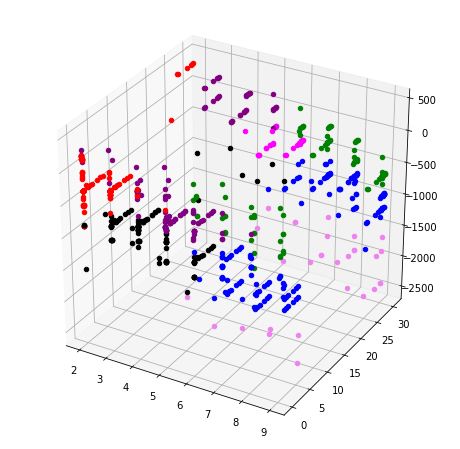

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for x in range(len(y2)):
    ax.scatter( xs=test_data[x][0] , ys=test_data[x][1], zs=test_data[x][3], color=colors[y2[x]]  )
